---
# Bibliotecas e extensões

---


In [ ]:
# Pacotes para visualização da árvore de decisão
!pip install pydotplus
!pip install dtreeviz

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


#Definando algumas configurações
pd.set_option('precision',2)

In [ ]:
from google.colab import files
uploaded = files.upload()

# Base : https://archive.ics.uci.edu/ml/datasets/Adult

Saving Adult_data.xlsx to Adult_data (1).xlsx


# A tarefa de previsão é determinar se uma pessoa ganha mais de 50 mil

#Campos encontrados no dataset

* idade: contínua.
* classe de trabalho: Privado, Autônomo-não-inc, Autônomo-inc, Governo federal, * Governo local, Governo estadual, Sem remuneração, Nunca trabalhou.
* fnlwgt: contínuo.
* educação: Bacharel, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* educação-num: contínuo.
* estado civil: Cônjuge-casado-civ, Divorciado, Nunca-casado, Separado, Viúvo, Cônjuge-casado-ausente, Cônjuge-AF-casado.
* ocupação: Suporte técnico, Reparação de artesanato, Outros serviços, Vendas, Executivo-gerente, Prof-especialidade, Manipuladores-limpadores, Inspeção de máquinas, Adm-clerical, Agricultura-pesca, Transporte-movimentação, Priv-house- serv, Protetor-serv, Forças Armadas.
* parentesco: Esposa, Filho próprio, Marido, Sem parentesco, Outro parente, Solteiro.
* raça: Branco, Asiático-Pac-Islandês, Amer-Indiano-Eskimo, Outros, Preto.
* sexo: Feminino, Masculino.
* ganho de capital: contínuo.
* perda de capital: contínua.
* horas por semana: contínua.
* país nativo: Estados Unidos, Camboja, Inglaterra, Porto-Rico, Canadá, Alemanha, Outlying-US (Guam-USVI-etc), Índia, Japão, Grécia, Sul, China, Cuba, Irã, Honduras, Filipinas, Itália , Polônia, Jamaica, Vietnã, México, Portugal, Irlanda, França, República Dominicana, Laos, Equador, Taiwan, Haiti, Colômbia, Hungria, Guatemala, Nicarágua, Escócia, Tailândia, Iugoslávia, El-Salvador, Trinadad&Tobago, Peru, Hong , Holanda-Holanda.

# Idioma Original

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house- serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy , Poland, Jamaica,

# Análise dos dados

## Analisando dataset

In [ ]:
df = pd.read_excel('Adult_data.xlsx')

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,attributes
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Tamanho do dataset
print("Quantidade de linhas: {}".format(df.shape[0]))
print("Quantidade de colunas: {}".format(df.shape[1]))

Quantidade de linhas: 32561
Quantidade de colunas: 15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  attributes      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
#Comparativo para análise dos dados quantitativos (Dados int64)
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.00,3.26e+04,32561.00,32561.00,32561.00,32561.00
mean,38.58,1.90e+05,10.08,1077.65,87.30,40.44
std,13.64,1.06e+05,2.57,7385.29,402.96,12.35
min,17.00,1.23e+04,1.00,0.00,0.00,1.00
25%,28.00,1.18e+05,9.00,0.00,0.00,40.00
50%,37.00,1.78e+05,10.00,0.00,0.00,40.00
75%,48.00,2.37e+05,12.00,0.00,0.00,45.00
max,90.00,1.48e+06,16.00,99999.00,4356.00,99.00


## Verificando colunas com dados tipo Object

In [ ]:
#conhecendo os tipos dedados em cada coluna
print("\n Coluna Workclass, valores:" , df['workclass'].unique())

print("\n Coluna education, valores:" , df['education'].unique())

print("\n Coluna marital-status, valores:" , df['marital-status'].unique())

print("\n Coluna occupation, valores:" , df['occupation'].unique())

print("\n Coluna relationship, valores:" , df['relationship'].unique())

print("\n Coluna race, valores:" , df['race'].unique())

print("\n Coluna sex, valores:" , df['sex'].unique())

print("\n Coluna native-country, valores:" , df['native-country'].unique())

print("\n Coluna attributes, valores:" , df['attributes'].unique())


 Coluna Workclass, valores: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

 Coluna education, valores: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

 Coluna marital-status, valores: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

 Coluna occupation, valores: [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

 Coluna relationship, valores: [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

 Coluna race, valores: [' White' ' Black' ' Asian-Pac-Islander' ' Am

Podemos ver que em 3 campos encontramos dados faltantes "?" 
<br>Workclass, occupation e  native-country

In [ ]:
#Vamos ver a quantidade de dados faltantes em cada coluna
print('Quantidade de dados "?" na coluna Workclass: ',(df['workclass'][df['workclass'] == ' ?']).count())

print('Quantidade de dados "?" na coluna occupation: ',(df['occupation'][df['occupation'] == ' ?']).count())

print('Quantidade de dados "?" na coluna native-country: ',(df['native-country'][df['native-country'] == ' ?']).count())

Quantidade de dados "?" na coluna Workclass:  1836
Quantidade de dados "?" na coluna occupation:  1843
Quantidade de dados "?" na coluna native-country:  583


##Retirando os dados faltantes da base

In [ ]:
#Podemos fazer de várias formas, mas optei por fazer passo a passo
#Para facilitar a leitura do processo
df_filtrado = df[df['workclass'] != " ?"]
df_filtrado = df_filtrado[df_filtrado['occupation'] != " ?"]
df_filtrado = df_filtrado[df_filtrado['native-country'] != " ?"]

In [ ]:
df_filtrado.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,attributes
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Modelagem
  vamos analisar a distribuição dos dados do tipo quantitativo.

### Age

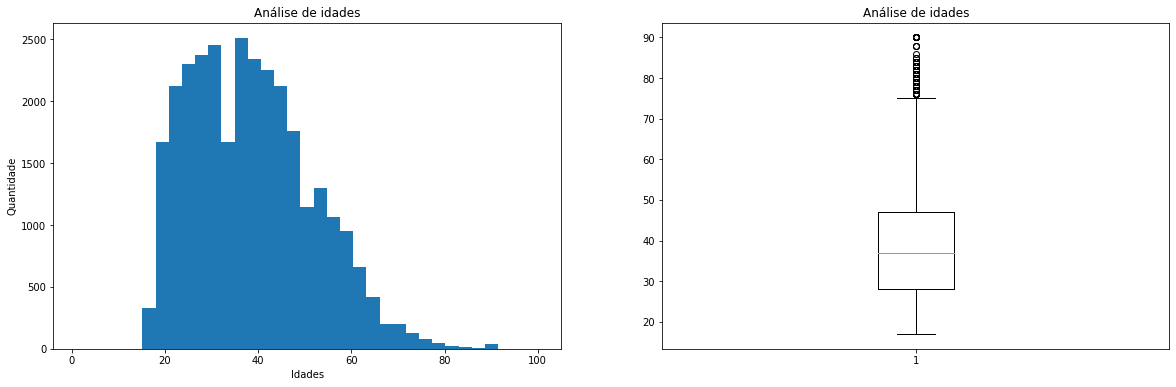

In [ ]:
plt.figure(figsize = ((20, 6)))
plt.subplot(1, 2, 1)
fig = plt.hist(df_filtrado['age'],  bins= 35,range=[1,100] )
fig = plt.title("Análise de idades")
fig = plt.xlabel("Idades")
fig = plt.ylabel("Quantidade")

plt.subplot(1, 2, 2)
fig = plt.boxplot(df_filtrado['age'])
fig = plt.title("Análise de idades")

#Podemos ver uma distribuição não uniforme dos dados puxando muito para faixas até ~45 anos e de 45 em diante uma queda drastica 
#Podemos ver também que temos alguns dados muito distantes dos quartis poderíamos análiser se é necessário excluílos do nosso modelo

In [ ]:
df_age = df_filtrado[df_filtrado['age'] > 80]
df_age
#Podemos ver que temos 75 registros acima de 80 anos, vale o questionamento se é necessário retirar.
#Optei por deixar os registros porém, vou classificalos em faixas 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,attributes
222,90,Private,51744,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,2206,40,United-States,<=50K
918,81,Self-emp-not-inc,136063,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,30,United-States,<=50K
1040,90,Private,137018,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
1168,88,Self-emp-not-inc,206291,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
1935,90,Private,221832,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31030,90,Private,47929,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
31855,82,Self-emp-not-inc,71438,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,20,United-States,<=50K
32277,90,Private,313749,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,25,United-States,<=50K
32367,90,Local-gov,214594,7th-8th,4,Married-civ-spouse,Protective-serv,Husband,White,Male,2653,0,40,United-States,<=50K


In [ ]:
#Estamos iterando cada linha e fazendo uma verificação do seu valor e adicionando uma nova coluna no dataframe 
#com os valores para facilitar na previsão do algorítimo
#Podemos fazer diversas faixas, mas para fins de estudo eu separei nessas 4.
age_fix = []
for index, row in df_filtrado.iterrows():
  if row[0] <= 25:
    age_fix.append("<=25")

  elif row[0] <= 45:
    age_fix.append("<=45")

  elif row[0] <= 60:
    age_fix.append("<=60")

  else:
    age_fix.append(">60")


df_filtrado['age_fix'] = age_fix


In [ ]:
df_filtrado

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,attributes,age_fix
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,<=45
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,<=60
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,<=45
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,<=60
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,<=45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,<=45
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,<=45
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,<=60
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,<=25


### fnlwgt

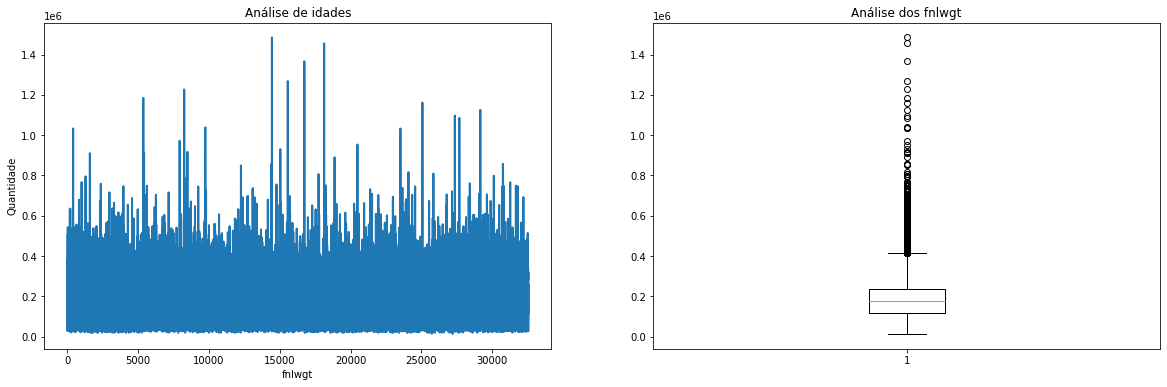

In [ ]:
plt.figure(figsize = ((20, 6)))
plt.subplot(1, 2, 1)
fig = plt.plot(df_filtrado['fnlwgt'], linewidth=2, markersize=12)
fig = plt.title("Análise de idades")
fig = plt.xlabel("fnlwgt")
fig = plt.ylabel("Quantidade")

plt.subplot(1, 2, 2)
fig = plt.boxplot(df_filtrado['fnlwgt'])
fig = plt.title("Análise dos fnlwgt")
#podemos ver que no gráfico de bloxplot que uma grande parte dos dados ficam fora dos quartis principais.

In [ ]:
#Estamos criando faixas para os valores encontrados na coluna fnlwgt
fnlwgt_fix = []

for index, row in df_filtrado.iterrows():
  if row[2] <= 10000:
    fnlwgt_fix.append("<=10K")

  elif row[2] <= 20000:
    fnlwgt_fix.append("<=20K")

  elif row[2] <= 30000:
    fnlwgt_fix.append("<=30K")
  
  elif row[2] <= 40000:
    fnlwgt_fix.append("<=40K")
  
  elif row[2] <= 45000:
    fnlwgt_fix.append("<=45K")
  
  elif row[2] <= 50000:
    fnlwgt_fix.append("<=50K")

  elif row[2] <= 55000:
    fnlwgt_fix.append("<=55K")
      
  elif row[2] <= 60000:
    fnlwgt_fix.append("<=60K")
  
  elif row[2] <= 65000:
    fnlwgt_fix.append("<=65K")

  elif row[2] > 65000:
    fnlwgt_fix.append(">65K")


df_filtrado['fnlwgt_fix'] = fnlwgt_fix


In [ ]:
df_filtrado

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,attributes,age_fix,fnlwgt_fix
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,<=45,>65K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,<=60,>65K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,<=45,>65K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,<=60,>65K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,<=45,>65K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,<=45,>65K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,<=45,>65K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,<=60,>65K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,<=25,>65K


# Classificação

In [80]:
# vamos separar dos dados em Data e Target
df_target = df_filtrado['attributes']

# vamos separar nosso dados target
df_data = df_filtrado.drop(columns=['attributes','capital-gain','capital-loss','fnlwgt','age','education-num']) # outra forma seria usar o iloc 
                                                   # df_filtrado.iloc[:,0:14]

In [81]:
X_dict = df_filtrado.drop(columns=['attributes','capital-gain','capital-loss','fnlwgt','age','education-num']).T.to_dict().values()
vect = DictVectorizer(sparse = False)
X_train = vect.fit_transform(X_dict)

In [82]:
le = LabelEncoder()
y_train = le.fit_transform(df_target)

In [83]:
# Exibe o dado convertido em dicionario.
print("Atributos:", X_dict)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [84]:
# Exibe a estrutura do dado convertido em binário.
print("Shape do dado de treinamento: {0}".format(X_train.shape))

print("Labels:", y_train)

Shape do dado de treinamento: (30162, 112)
Labels: [0 0 0 ... 0 0 1]


In [178]:
tree_adult = DecisionTreeClassifier(random_state = 0 , criterion = 'gini', min_samples_split= 15, max_leaf_nodes=50)
tree_adult = tree_adult.fit(X_train, y_train)
print("Acurácia:", tree_adult.score(X_train, y_train))

Acurácia: 0.8281612625157483


In [179]:
y_pred = tree_adult.predict(X_train)
print("Acurácia de previsão:", accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))

Acurácia de previsão: 0.8281612625157483
              precision    recall  f1-score   support

           0       0.86      0.91      0.89     22654
           1       0.69      0.57      0.62      7508

    accuracy                           0.83     30162
   macro avg       0.78      0.74      0.76     30162
weighted avg       0.82      0.83      0.82     30162



In [180]:
cnf_matrix = confusion_matrix(y_train, y_pred)
cnf_matrix

array([[20719,  1935],
       [ 3248,  4260]])

In [181]:
cnf_table = pd.DataFrame(data=cnf_matrix, index=["Jogar=Não Ganha", "Jogar=Sim Ganha"], columns=["Ganha 50k?=Não", "Ganha 50k?=Sim"])
print(cnf_table)

                 Ganha 50k?=Não  Ganha 50k?=Sim
Jogar=Não Ganha           20719            1935
Jogar=Sim Ganha            3248            4260


# Árvore de Decisão

In [182]:
from dtreeviz.trees import *

viz = dtreeviz(tree_adult,
              X_train,
              y_train,
              target_name='>50k',
               feature_names=vect.feature_names_,
              class_names=["sim", "nao"],
              fancy=True)  

viz.view()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


In [183]:
import pydotplus 
# Create DOT data
dot_data = tree.export_graphviz(tree_adult, out_file=None, 
                                feature_names=vect.feature_names_,  
                                rounded =True,
                                filled=True,
                                class_names=["sim", "nao"])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data) 

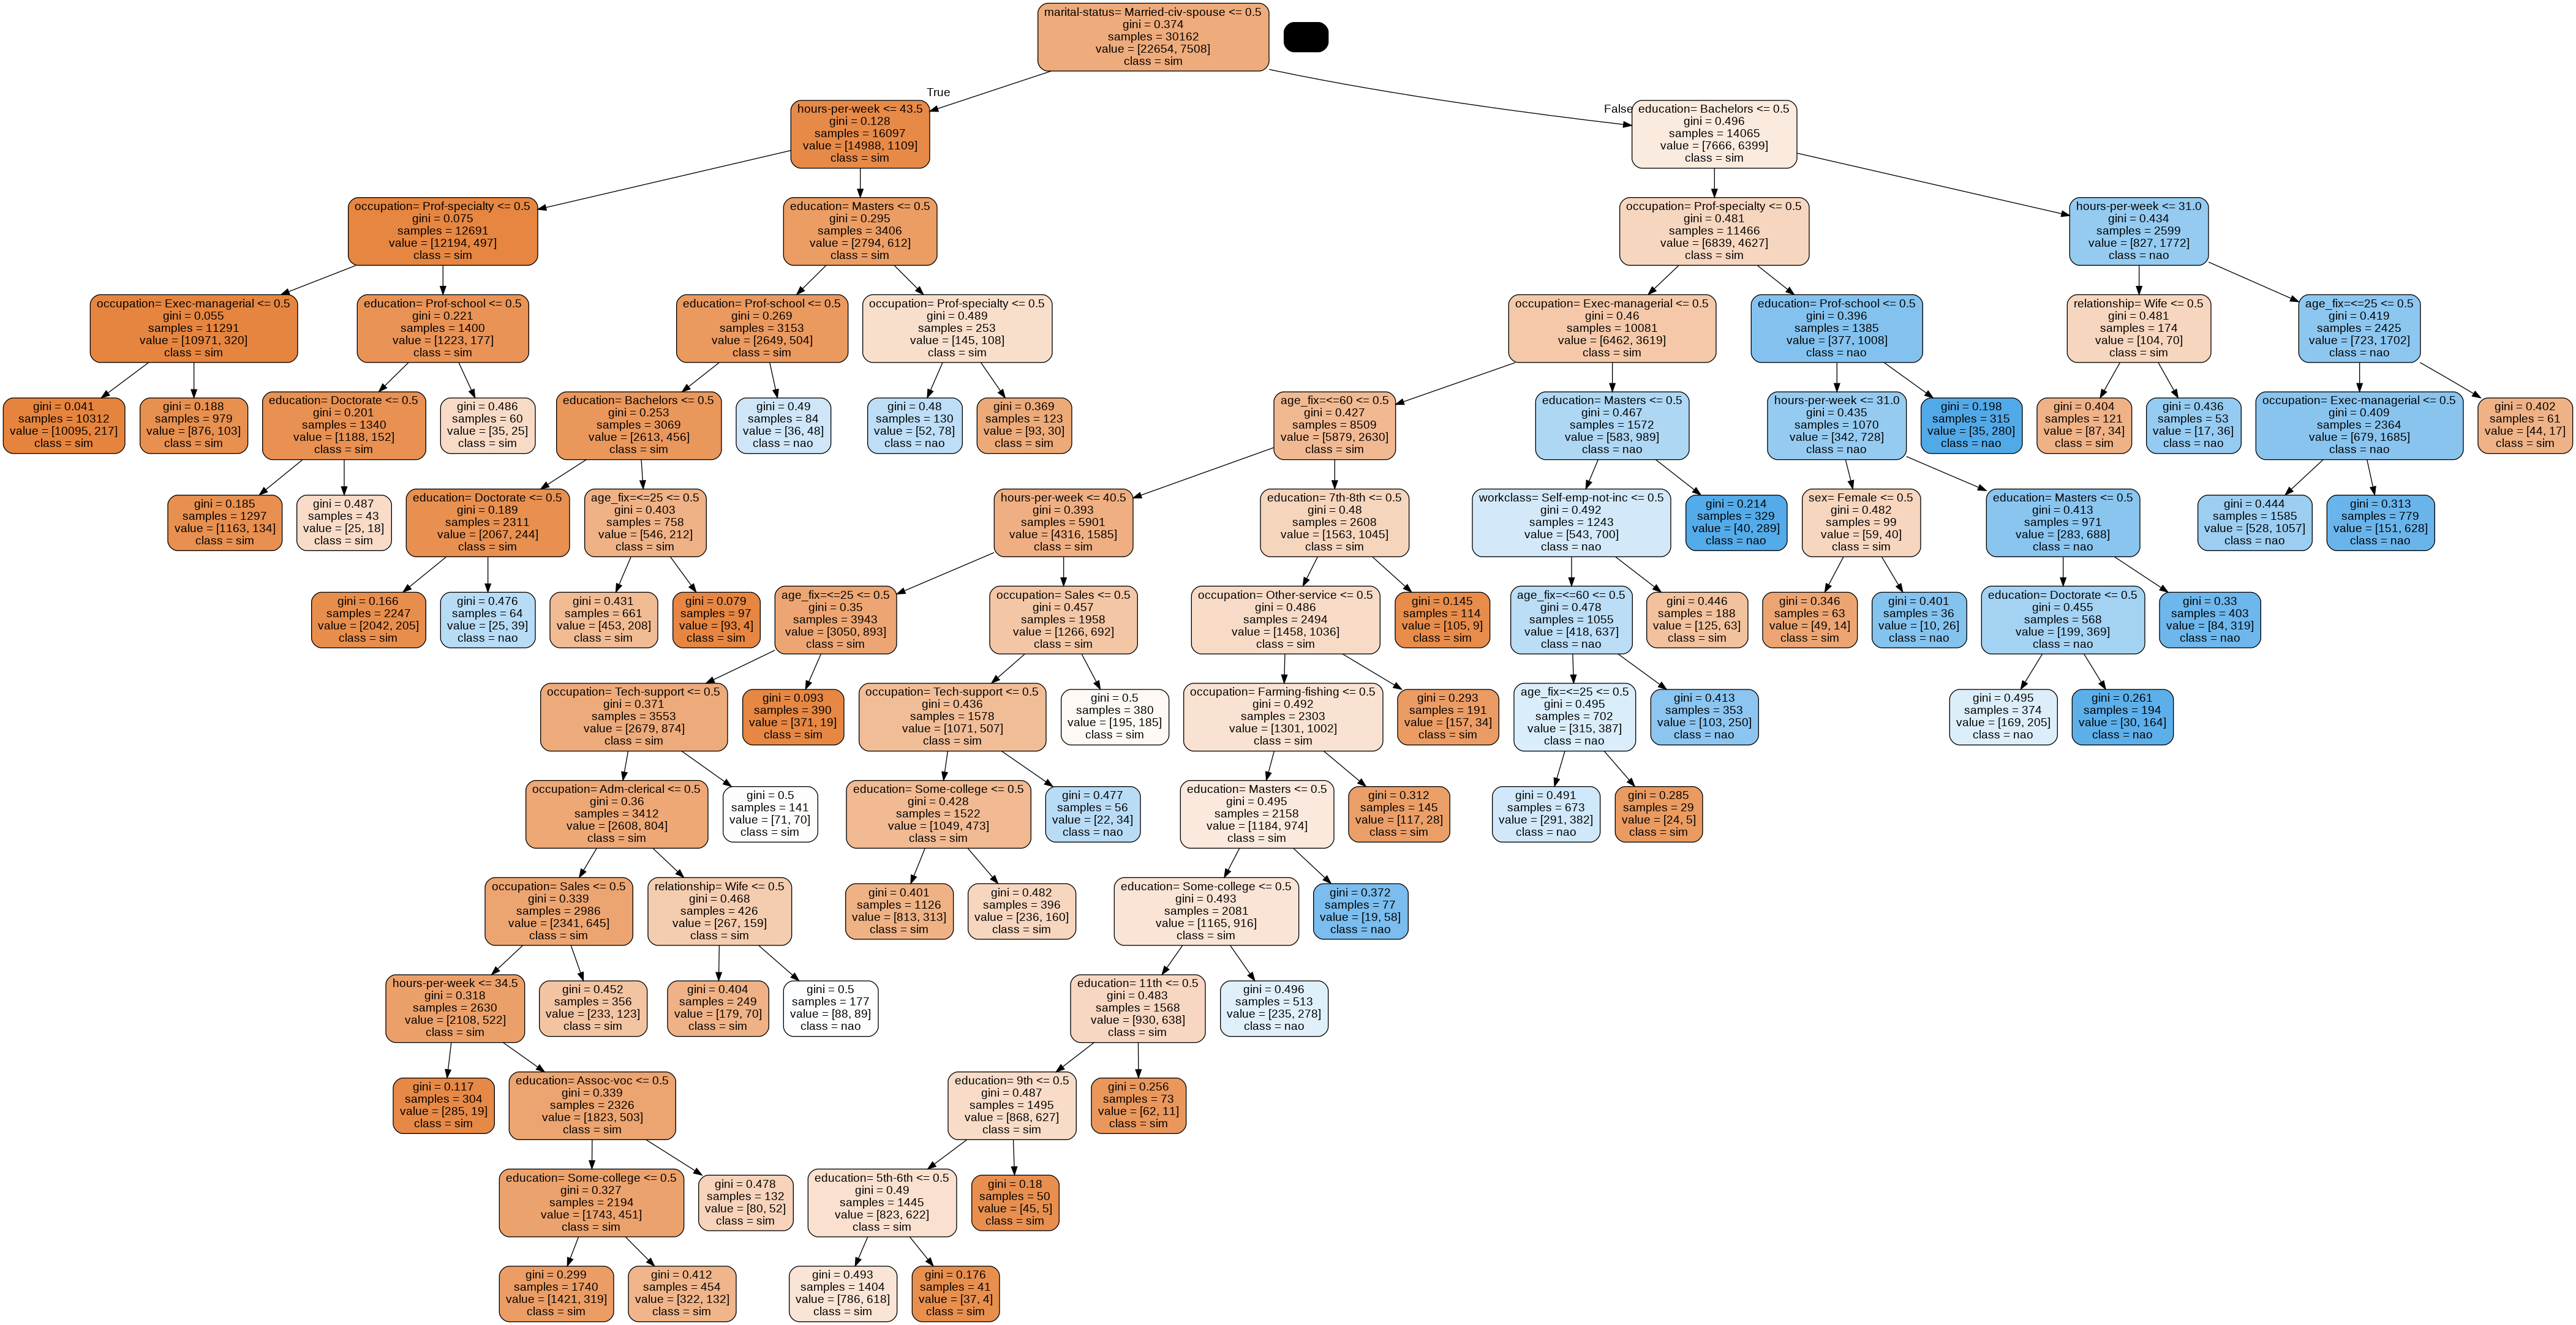

In [184]:
from IPython.core.display import Image as img
from PIL import Image 
img(graph.create_png())

In [185]:
#Vamos exportar nossa Árvore
graph.write_pdf("Arvore.pdf")

True